In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
nba = pd.read_csv("Nba_Clean.csv")
nba.drop(columns=["Unnamed: 0"], inplace= True)

In [3]:

nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,country,gp,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22,193,94.8,USA,64,3.9,1.5,2.4,0.04,0.07,0.17,0.49,0.25,1996-97
1,Gaylon Nickerson,WAS,28,190,86.2,USA,4,3.8,1.3,0.3,0.03,0.11,0.17,0.50,0.04,1996-97
2,George Lynch,MEM,26,203,103.4,USA,41,8.3,6.4,1.9,0.11,0.18,0.18,0.51,0.12,1996-97
3,George McCloud,LAL,30,203,102.1,USA,64,10.2,2.8,1.7,0.03,0.11,0.21,0.53,0.12,1996-97
4,George Zidek,DEN,23,213,119.7,USA,52,2.8,1.7,0.3,0.10,0.17,0.20,0.50,0.06,1996-97


## Vamos a sacar la grafica historica de la puntuacion, rebotes, y asistencias para ver la tendencia del paso de lo años con ellos podremos ver visualmente el crecimiento de esta.

In [4]:
grafica_pts_reb_asist=nba.groupby(["season"]).agg({"pts":"sum", "reb":"sum","ast":"sum"}).sort_values(by ="season", ascending=True)

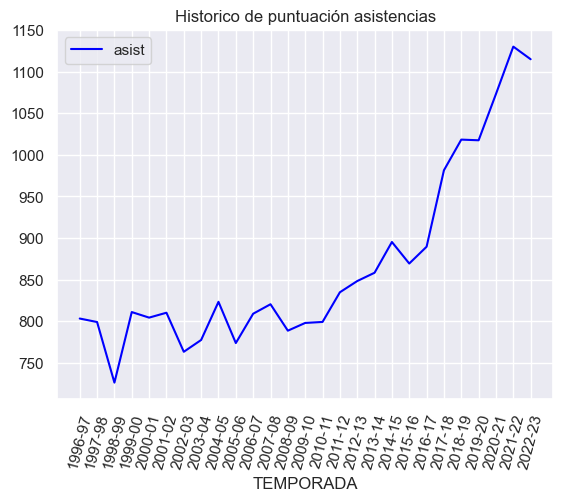

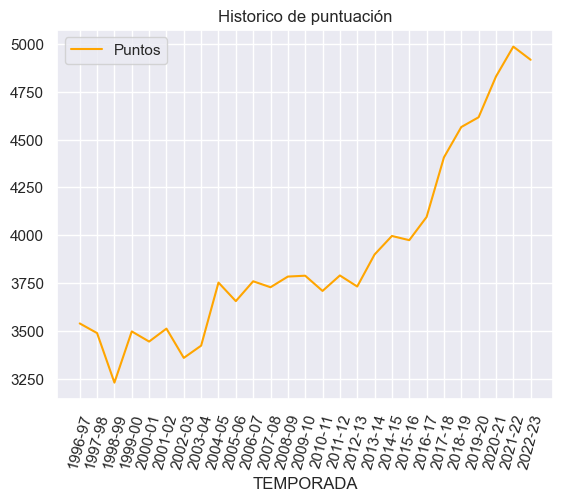

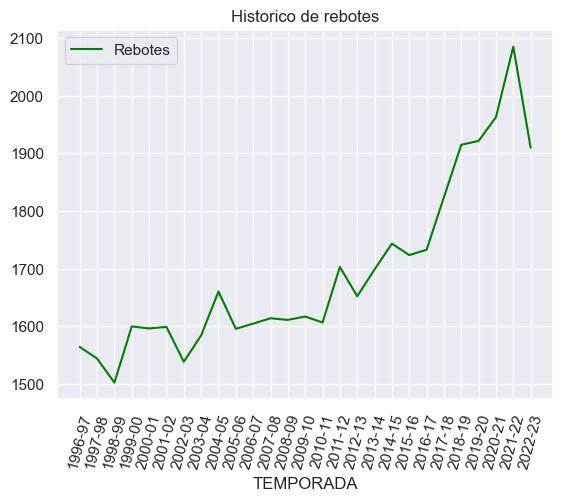

In [5]:
# Configurar el estilo de Seaborn
sns.set(style="darkgrid")

sns.lineplot(data=grafica_pts_reb_asist, x='season', y='ast', label='asist', color="blue")
plt.title("Historico de puntuación asistencias")
plt.xticks(rotation=75)
plt.legend()
plt.xlabel("TEMPORADA")
plt.ylabel(None)
plt.show()

sns.lineplot(data=grafica_pts_reb_asist, x='season', y='pts', label='Puntos', color="orange")
plt.title("Historico de puntuación")
plt.xticks(rotation=75)
plt.legend()
plt.xlabel("TEMPORADA")
plt.ylabel(None)
plt.show()

sns.lineplot(data=grafica_pts_reb_asist, x='season', y='reb', label='Rebotes', color="green")
plt.title("Historico de rebotes")
plt.xticks(rotation=75)
plt.legend()
plt.xlabel("TEMPORADA")
plt.ylabel(None)
plt.show;

In [40]:
#sacamos la mediana de la altura.
nba.player_height.median(), nba.player_weight.median()

(200.0, 99.8)

In [21]:
# Separamos en variables para poder clasificar jugadores altos y bajos.
player_small = nba[nba["player_height"] < 200.0 ]

player_tall = nba[nba["player_height"] >= 200.0 ]

In [34]:
from scipy.stats import spearmanr, pearsonr

correlation, p_value = spearmanr(nba["player_height"], nba["pts"])
print("Coeficiente de correlación de Spearman:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Spearman: -0.07633116444730773
Valor p: 4.61475523890512e-18


In [36]:
correlation, p_value = pearsonr(nba["player_height"], nba["pts"])
print("Coeficiente de correlación de Pearson:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: -0.05501309480186628
Valor p: 4.4086336774929587e-10


In [38]:
from scipy.stats import spearmanr, pearsonr

correlation, p_value = spearmanr(nba["player_weight"], nba["pts"])
print("Coeficiente de correlación de Spearman:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Spearman: -0.04573458726699415
Valor p: 2.1558380735431208e-07


In [39]:
correlation, p_value = pearsonr(nba["player_weight"], nba["pts"])
print("Coeficiente de correlación de Pearson:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: -0.025035173659313584
Valor p: 0.0045477016585365945


In [10]:
# despues de hacer la correlacion de pearson por si es lineal y la de espearman por si es monontona nos dicen
# que tienen una coorrelacion nula o muy baja

## como vemos tiene correlacion la altura con la cantidad de puntos anotados aunque sea muy debil la correlacion por el metodo usado, pero la pvalor nos dice que no podemos rechazar la hipotesis 0 

## ahora sacaremos la grafica de comparacion de puntuación, vemos levemente que los jugadores altos anotan mas que los jugadores mas bajos


In [37]:
grafica_total = nba.groupby(nba['player_height'] >= 200).agg({'pts':"sum"})
grafica_total.rename(index={False:"jugadores < 200cm",True:"jugadores > 200cm"}, inplace =True)

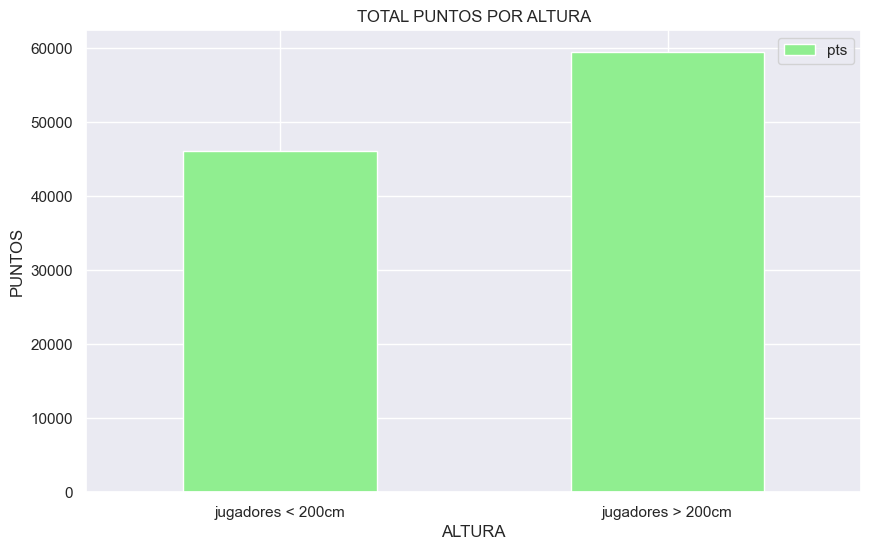

In [14]:
grafica_total.plot(kind="bar", color= ['lightgreen'],figsize=(10, 6))
plt.xticks(rotation=0)
plt.title("TOTAL PUNTOS POR ALTURA")
plt.ylabel("PUNTOS")
plt.xlabel("ALTURA")
plt.show()

In [41]:
grafica_total = nba.groupby(nba['player_weight'] >= 99.8).agg({'pts':"sum"})
grafica_total.rename(index={False:"jugadores < 99.8 kg",True:"jugadores > 99.8 kg"}, inplace =True)

In [43]:
grafica_total

,pts
player_weight,
jugadores < 99.8 kg,50071.4
jugadores > 99.8 kg,55411.0


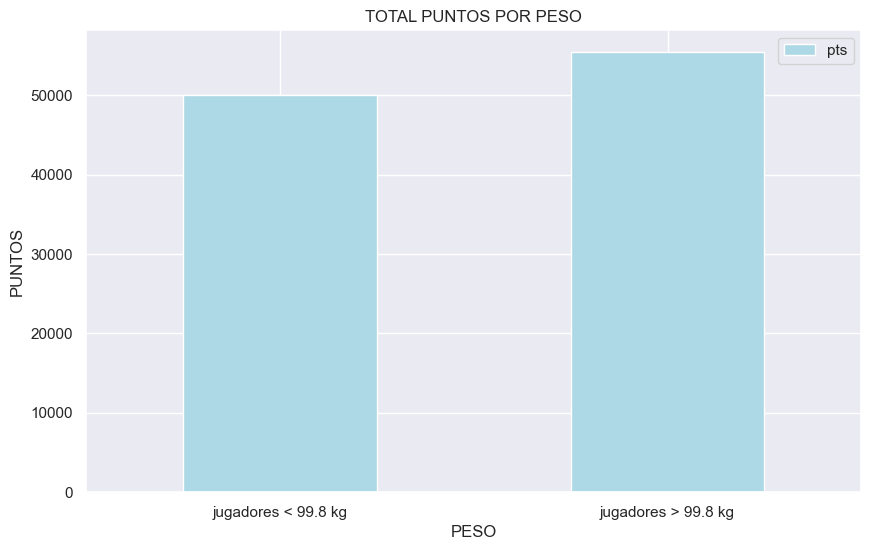

In [44]:
grafica_total.plot(kind="bar", color= ['LIGHTblue'],figsize=(10, 6))
plt.xticks(rotation=0)
plt.title("TOTAL PUNTOS POR PESO")
plt.ylabel("PUNTOS")
plt.xlabel("PESO")
plt.show()